# DATA INCUBATOR CAPSTONE PROJECT on COVID-19 Exploratory Data Analysis
### The objective of the project is to: 
### 1) explore and analyse the data of the COVID-19 global infection cases.
### 2) Compare the COVID-19 cases among four majorly impacted countries - Italy, Spain, United Kingdom, and     US

## 1. Import Libraries and data downloaded from https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\Samir Prasun\\Desktop\\Data Incubator\\time-series-covid19.csv")

df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


## 2. Check for any null values in the dataframe

In [2]:
df.drop(["Lat","Long","Province/State"], axis=1, inplace=True)
np.where(pd.isnull(df))


(array([3315, 3316, 3317, ..., 4587, 4588, 4589], dtype=int64),
 array([3, 3, 3, ..., 3, 3, 3], dtype=int64))

## 3. Remove rows with null values

In [3]:
df=df.dropna(how='any')
print(np.where(pd.isnull(df)))
df.describe()

(array([], dtype=int64), array([], dtype=int64))


,Confirmed,Recovered,Deaths
count,21165.000000,21165.000000,21165.000000
mean,1555.128798,379.898748,83.337586
std,15005.231066,3635.384506,913.134378
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,120.000000,10.000000,1.000000
max,636350.000000,72600.000000,28326.000000


Text(0.5, 0, 'Date')

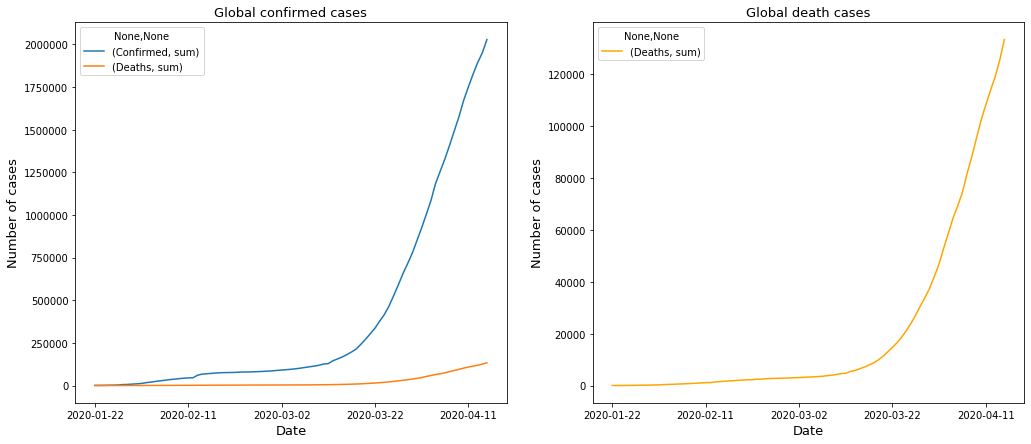

In [4]:

confirmed_total_date = df.groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date = df.groupby(['Date']).agg({'Deaths':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global death cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)


# Observations
### The two plot reveals the global confirmed COVID cases and global death cases. Following analysis can be deduced from the plots:
### 1) The global confirmed and death cases show the similar trend demonstrating slower increase untill (22nd March approx.) followed by sharp increase in the slope untill 15th March
### 2) The increase in the slope may be explained by the increased supply of testing kits despite the greater global percentage of population under national lockdown
### 3) The ratio of deaths to the infected confirmed cases is approximately 6%, which reveals the threat posed by the Corona Virus. 

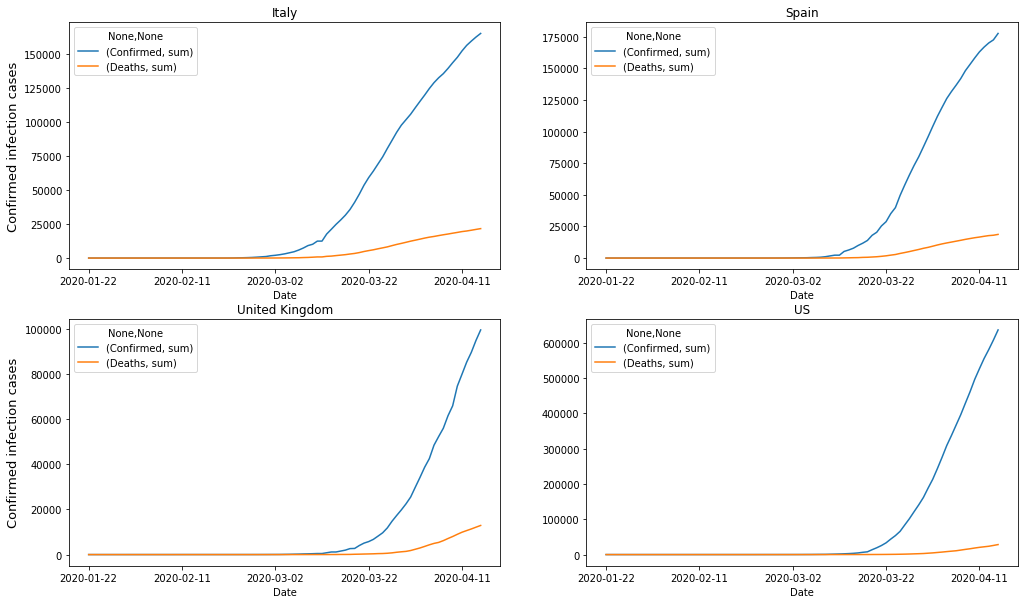

In [5]:
confirmed_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)


confirmed_total_date_Spain = df[df['Country/Region']=='Spain'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Spain = df[df['Country/Region']=='Spain'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

confirmed_total_date_UK = df[df['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_UK = df[df['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)


confirmed_total_date_US = df[df['Country/Region']=='US'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_US = df[df['Country/Region']=='US'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)


plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_US.plot(ax=plt.gca(), title='US')


# Observations
### 1.) The plots reveal the confirmed and death COVID cases for four different countries - Italy, Spain, United Kingdom, and US.
### 2.) Spain and Italy demonstrate in the higher increase in cases in beginning of March whereas, United Kingdom and US demonstrated the increase rate of cases beginning from late March.
### 3.) Altough it seems Spain and Italy is beginning to flatten the curve now (slope reducing at the end) because of heavy national lockdown measures, whereas US and United Kingdom is still experiencing the increased surge in cases

(0, 0.05)

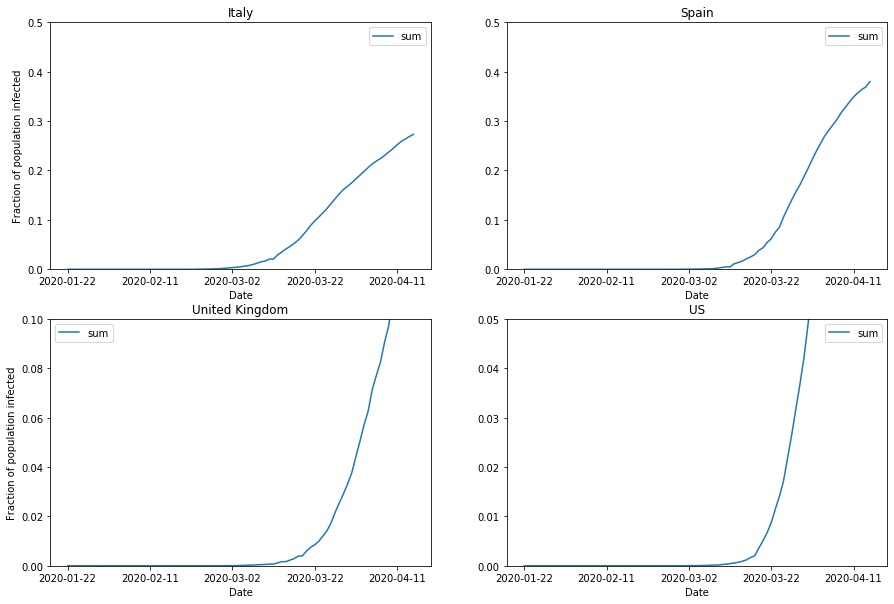

In [6]:
pop_italy = 60486683.
pop_spain = 46749696.
pop_UK = 67784927.
pop_US = 382000000.

total_date_Italy.Confirmed = total_date_Italy.Confirmed/pop_italy*100.
total_date_Italy.Deaths = total_date_Italy.Deaths/pop_italy*100.
total_date_Spain.Confirmed = total_date_Spain.Confirmed/pop_spain*100.
total_date_Spain.Deaths = total_date_Spain.Deaths/pop_spain*100.
total_date_UK.Confirmed= total_date_UK.Confirmed/pop_UK*100.
total_date_UK.Deaths = total_date_UK.Deaths/pop_UK*100.
total_date_US.Confirmed = total_date_US.Confirmed/pop_US*100.
total_date_US.Deaths = total_date_US.Deaths/pop_US*100.

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.Confirmed.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.5)

plt.subplot(2, 2, 2)
total_date_Spain.Confirmed.plot(ax=plt.gca(), title='Spain')
plt.ylim(0, 0.5)

plt.subplot(2, 2, 3)
total_date_UK.Confirmed.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.1)

plt.subplot(2, 2, 4)
total_date_US.Confirmed.plot(ax=plt.gca(), title='US')
plt.ylim(0, 0.05)
(0, 0.05)

# Observations
### 1.The plots show that although the actual number of affected COVID cases are higher in United Kingdom and US, the fractional population of infected cases is lower in these countries as compared to that of Spain and Italy.
### 2. These plots demonstrate the acute severity of covid cases in Spain and Italy.

# 